<a href="https://colab.research.google.com/github/SeoMinJong/1day-1study/blob/master/ex_eda_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  신용 카드 사용 기록 EDA.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 0. 필요한 패키지를 불러온다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pd.set_option("precision",2)

#### 1. 데이터를 불러와서 살펴 본다.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BigData/credit/data_credit.csv')

In [ ]:
df.shape

(3362796, 8)

In [5]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


#### 2. 데이터를 정제하고 결측치 처리를 한다.

In [7]:
# 결측치가 분명히 있는 것 같으니 컬럼별 집계해 본다.
nas = df.isnull()
print(nas.sum(axis=0))

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [8]:
# installments 변수의 도수분포를 본다.
df['installments'].value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [ ]:
# 일시불이 NA로 처리 되었으니 결측치를 1로 채운다.
df = df.fillna(value=1)
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0


In [97]:
# 다시 installments 변수의 도수분포를 본다.
df['installments'].value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [11]:
df['month'] = df.date.apply( lambda x : x[5:7] ) # x[4:],x[5:7],x[8:10]
df['hour'] = df.time.apply( lambda x : x[:2] ) # x[4:],x[5:7],x[8:10]

In [14]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,12,18
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,12,18
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,12,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,12,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,12,13


In [15]:
# 일단 date와 time은 사용하지 않겠으니 제거한다.
df = df.drop(columns=['date','time'])
df.head(5)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,NaN,2,0,12,18
1,0,d297bba73f,-5,NaN,2,0,12,18
2,0,0880849c05,144,NaN,0,0,12,12
3,0,8b4f9e0e95,66,NaN,0,0,12,12
4,0,7ad237eed0,24,NaN,0,0,12,13


#### 3. 개개 변수를 다양한 방법으로 요약하고 시각화 한다.

In [33]:
print(df.store_id.nunique())
print(df.card_id.nunique())

1775
922522


3.1. store_id 등장 횟수의 히스토그램.

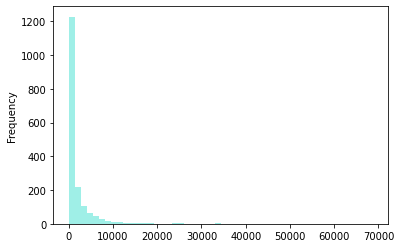

In [16]:
freq1 = df['store_id'].value_counts()
freq1.plot.hist(bins=50,color="turquoise",alpha=0.5)
#sns.distplot(freq1.values,bins=50,color="turquoise")      # 다른 방법.
plt.show()

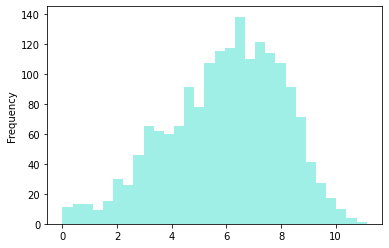

In [17]:
# 큰 skew를 보이므로 log 변환해 본다.
freq1b = np.log(freq1)
freq1b.plot.hist(bins=30,color="turquoise",alpha=0.5)
plt.show()
# 사용 빈도

In [18]:
# 중위수를 계산해 본다.
print(np.median(freq1))

492.0


In [19]:
# Top store id를 본다.
freq1.sort_values(ascending=False)[:10]

0       68773
753     39318
105     36063
1342    33335
428     33285
221     31409
161     27170
1038    25694
323     25221
1366    24946
Name: store_id, dtype: int64

3.2. card_id 사용 횟수의 히스토그램.

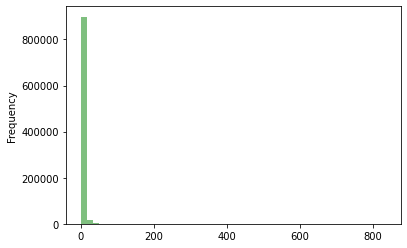

In [20]:
# 판다스에서 시각화를 할 수 있는 방법
freq2 = df['card_id'].value_counts()
freq2.plot.hist(bins=50,color="green",alpha=0.5)
#sns.distplot(freq2.values,bins=50,color="green")         # 다른 방법.
plt.show()

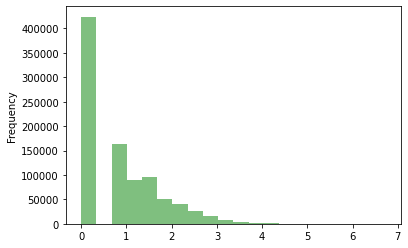

In [21]:
# 큰 skew를 보이므로 log 변환해 본다.
freq2b = np.log(freq2)                                              
freq2b.plot.hist(bins=20,color="green",alpha=0.5)
#sns.distplot(freq2b.values,bins=20,color="green",kde=False)           # 다른 방법.
plt.show()

In [22]:
# 사용 횟수 Top 10 card id를 본다. sort_value를 사용해서 상위부터 [:10] 만 볼 수 있다.
freq2.sort_values(ascending=False)[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

In [57]:
df[df['card_id'] == '53817035d4'].amount.mean()

11.337724550898203

3.3. amount의 히스토그램.

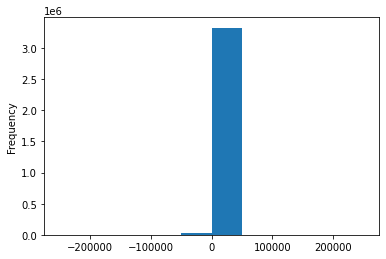

In [23]:
df['amount'].plot.hist(bins=10)
# sns.distplot(df.amount,bins=10,kde=False)
plt.show()

In [24]:
# 실제 구매 or Cancel.
ser = df.amount > 0
np.round(ser.mean(),4)             # 실제 구매의 퍼센티지.

0.9896

In [49]:
# 특이한 케이스

df.iloc[df.amount.argmax()]
df.iloc[df.amount.argmin()]


store_id               370
card_id         1c492f54f0
amount             -250000
installments             3
days_of_week             0
holyday                  0
month                   03
hour                    19
Name: 929473, dtype: object

In [47]:
(x < 0).mean() # 환불의 확률

0.3520408163265306

In [48]:
(df.amount < 0).mean() # 전체 amount에서 -가 1%밖에 안되기 때문에 모든 가게의 평균 환불값은 

0.010060675699626145

In [50]:
df[df.card_id == '1c492f54f0'] # 카드id가 1c492f54f0(특이케이스)인 사람의 모든 거래 내역

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
929470,370,1c492f54f0,250000,3.0,0,0,01,12
929473,370,1c492f54f0,-250000,3.0,0,0,03,19



3.4. installments의 막대그림.

In [53]:
freq3 = df['installments'].value_counts()
print("installments의 가짓수 = {}".format((freq3.index).nunique()))

installments의 가짓수 = 16


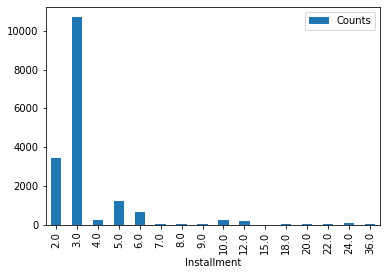

In [55]:
# 도수 분포를 본다.
freq3 = freq3.sort_index()
df2 = pd.DataFrame({"Installment": freq3.index, "Counts":freq3.values})
df2.plot.bar(x="Installment")
#sns.countplot(data=df, x='installments')   # Seaborn의 countplot() 함수로 집계하여 보여준다.  
plt.show()

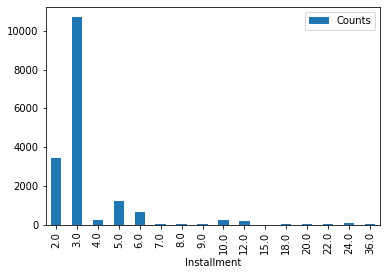

In [52]:
# installment = 1 (일시불)이 너무나 많으니 제거하고 다시 시각화 해본다.
freq3b = df[df.installments != 1]['installments'].value_counts()
freq3b = freq3b.sort_index()
df2 = pd.DataFrame({"Installment": freq3b.index, "Counts":freq3b.values})
df2.plot.bar(x="Installment")
#sns.countplot(data=df[df.installments != 1], x='installments')               # 다른 방법.
plt.show()

3.5. days_of_week의 도수 막대그림.

days of week의 가짓수 = 7


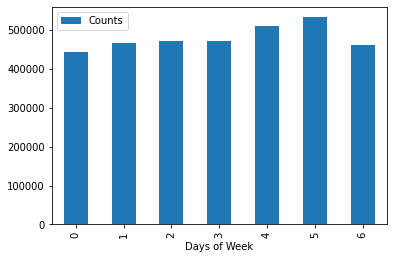

In [28]:
freq4 = df['days_of_week'].value_counts()
freq4 = freq4.sort_index()
df2 = pd.DataFrame({"Days of Week": freq4.index, "Counts":freq4.values})
df2.plot.bar(x="Days of Week")
print("days of week의 가짓수 = {}".format((freq4.index).nunique()))
plt.show()

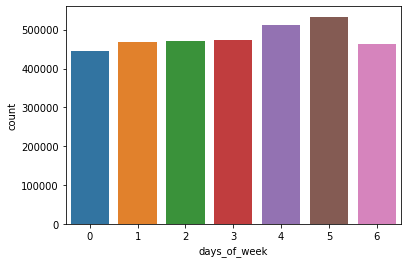

In [29]:
# Seaborn의 countplot() 함수로 집계하여 보여준다.
# 집계와 시각화를 한번에 해준다.
sns.countplot(data=df, x='days_of_week')
plt.show()

3.6. holiday의 막대그림.

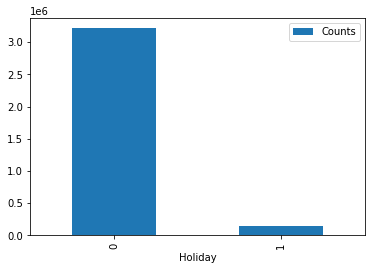

In [30]:
freq5 = df['holyday'].value_counts()                    # 스펠링 오류!!!
freq5 = freq5.sort_index()
df2 = pd.DataFrame({"Holiday": freq5.index, "Counts":freq5.values})
df2.plot.bar(x="Holiday")
plt.show()

#### 4. 수치형 변수 + 명목형 변수를 조합한 분석과 시각화.

In [59]:
# 휴일 여부별 평균 사용 금액.
df.groupby('holyday')['amount'].mean()

# pd.pivot_table을 사용한 평균 금액 출력
pd.pivot_table(df, columns=['holyday'], values=['amount'], aggfunc= np.mean)

holyday,0,1
amount,146.48,134.88


In [60]:
pd.pivot_table(df, columns=['days_of_week'], values=['amount'], aggfunc= np.mean)

days_of_week,0,1,2,3,4,5,6
amount,143.2,148.23,149.43,150.45,150.95,146.96,131.53


In [61]:
# 요일별 평균 결제 금액.
ser1 = df.groupby('days_of_week')['amount'].mean()
ser1

days_of_week
0    143.20
1    148.23
2    149.43
3    150.45
4    150.95
5    146.96
6    131.53
Name: amount, dtype: float64

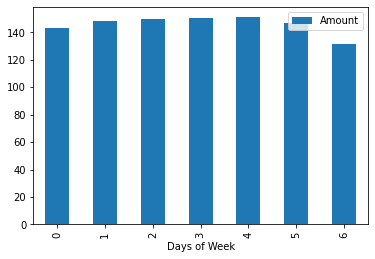

In [62]:
# 시각화.
pd.DataFrame({"Days of Week":ser1.index, "Amount":ser1.values}).plot.bar(x="Days of Week")
plt.show()

In [ ]:
# store_id 별 평균 결제 금액.
ser2 = df.groupby('store_id')['amount'].mean()
ser2.plot.hist(x="Store ID",title="Mean Amount by Store",bins=50)
plt.show()

In [63]:
# store_id 별 Total 결제 금액. Top 10.
ser2b = df.groupby('store_id')['amount'].sum()
ser2b.sort_values(ascending=False)[:10]

store_id
753     9474601
1342    7301327
161     5236075
0       5234611
958     4965728
1076    4860885
810     3677501
1024    3330293
486     3235482
597     2999180
Name: amount, dtype: int64

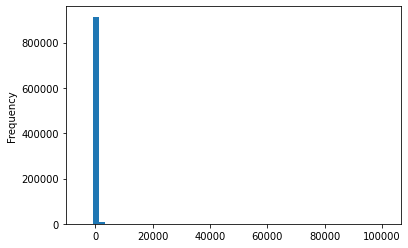

In [64]:
# card_id 별 평균 결제 금액.
ser3 = df.groupby('card_id')['amount'].mean()
ser3.plot.hist(bins=50)
plt.show()

In [66]:
df.groupby('card_id').amount.mean().sort_values()

card_id
c43fee0edb     -4980.00
8589f5980e     -1557.71
7e74575056      -330.00
8a3dc45eaa      -156.25
5c127f94cd       -59.00
                ...    
f408c22f2a     45000.00
704b7f81dc     45570.00
e5d233d934     49000.00
7fbba44248     73388.00
fae5d55226    101190.00
Name: amount, Length: 922522, dtype: float64

In [ ]:
# card_id 별 Total 결제 금액. Top 10.
ser3b = df.groupby('card_id')['amount'].sum()
ser3b.sort_values(ascending=False)[:10]

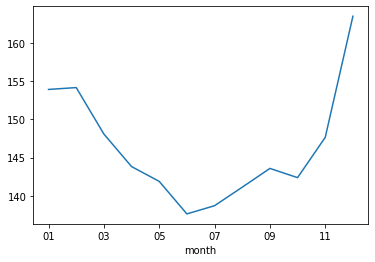

In [70]:
df.groupby('month').amount.mean().sort_index().plot()
# df.groupby('month').amount.mean().sort_index().plot() sum은 데이터가 고르지않다면 혼동을 줄 수 있다.

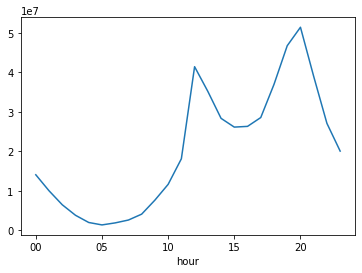

In [72]:
df.groupby('hour').amount.sum().sort_index().plot()

In [96]:
from IPython.core.pylabtools import figsize
#month별 시간대 별 패턴
pv_ta1 = pd.pivot_table(df, index='hour', columns= 'month', values='amount', aggfunc = 'sum')
# pd.pivot_table(전체 데이터 프레임, index='column명', columns='column명', values='수치값 column명', aggfunc = '사용할 집계시 계산  함수')
# columns = 그래프의 개수(행별) ,index = x축(열별), values = y축(수치값)

In [94]:
pv_ta1.head()

month,01,02,03,04,05,06,07,08,09,10,11,12
hour,,,,,,,,,,,,
00,1095703,1073429,1398489,1254508,1356970,1332478,1355142,965794,965252,1024424,1004383,1244975
01,810388,816068,912696,901987,1002022,955644,984113,673434,708515,738632,683999,835329
02,529842,470947,594815,605800,632496,615775,586970,484788,452554,468441,464699,575809
03,342464,273492,342650,358548,375989,370996,373704,251919,249986,267833,285840,330221
04,197412,142950,177415,196384,200605,177020,180119,117153,107909,159975,162808,179452


Text(0.5, 1.0, 'month_(hour_amount)')

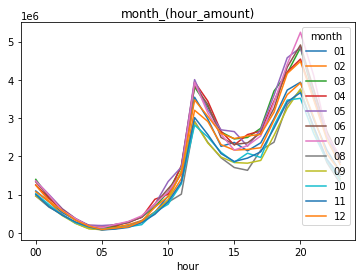

In [95]:
pv_ta1_plot = pv_ta1.plot()
pv_ta1_plot.set_title("month_(hour_amount)")

#### 5. 등급화.

5.1. store_id 별 Total 결제 금액에 의한 3 등급 분류.

In [76]:
ser2c = pd.qcut(ser2b,3,labels=['Low', 'Medium', 'High'])                      # qcut() 함수 사용!

In [ ]:
combo2 = pd.DataFrame({"Store ID":ser2b.index, "Amount":ser2b.values, "Category":ser2c.values}) # store_id 별 amount ser2b Category
combo2.head(10)

In [ ]:
# 등급별 평균.
combo2.groupby("Category")["Amount"].mean()

5.2. card_id 별 Total 결제 금액에 의한 3 등급 분류.

In [ ]:
ser3c = pd.qcut(ser3b,3,labels=['Low', 'Medium', 'High'])
combo3 = pd.DataFrame({"Card ID":ser3b.index,"Amount":ser3b.values, "Category":ser3c.values})
combo3.head(10)

In [ ]:
# 등급별 평균.
combo3.groupby("Category")["Amount"].mean()